<html> <h1 style="font-style:bold; color:blue;"> Neural Computing and Deep Learning </h1> </html>

<html> <h1 style="font-style:italic; color:blue;"> Week-10 </h1> </html>

<html> <h2 style="font-style:italic; color:blue;"> Simple AutoEncoders with Image Data </h2> </html>

Here is a simple autoencoder with just the dense layers.


Load the data and import the libraries.

In [1]:
# Your code to import matplotlib, pandas and numpy libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

_______________________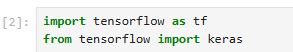

In [2]:
import tensorflow as tf
from tensorflow import keras

__________________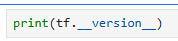

In [3]:
print(tf.__version__)

2.19.0


2.18.0


____________________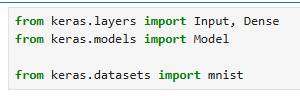

In [4]:
from keras.layers import Input, Dense
from keras.models import Model

from keras.datasets import mnist

In [5]:
# Your code to load MNIST data and store it in variables x_train, x_test. 
# Note -  we do not need labels as it's autoencoder.

(x_train, _), (x_test, _) = mnist.load_data()


______________________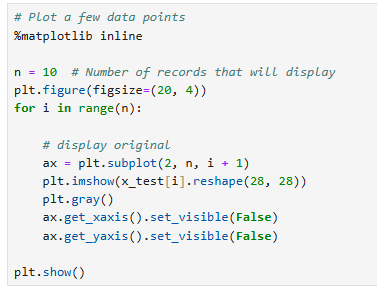

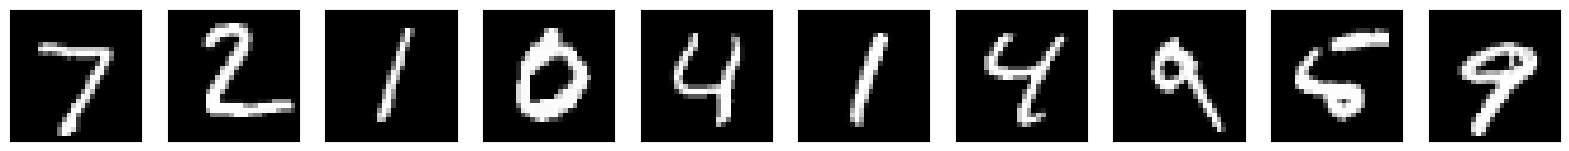

In [6]:
%matplotlib inline

n = 10  # Number of records that will display
plt.figure(figsize=(20, 4))
for i in range(n):
    
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

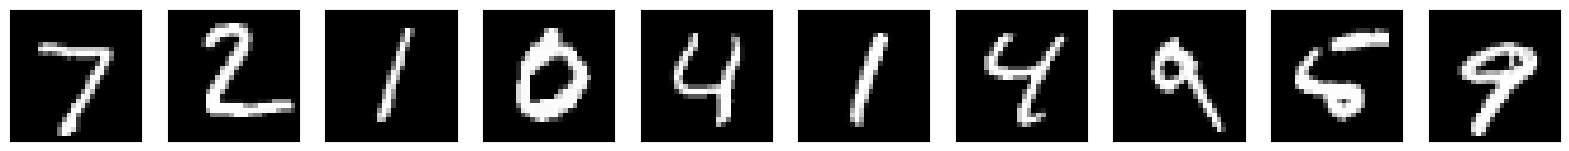

In [7]:
# Your code to
# normalise train data - Divided by 255

#

# normalise test data - Divided by 255

#
x_train = x_train/255
x_test  = x_test/255


<html> <h3 style="font-style:italic; color:blue;"> Basic AutoEncoder : </h3> </html>

Build a basic symmetric encoder-decoder network that recreates the image.  
This network could be used in dimensionaliry reduction or feature learning. 


________________________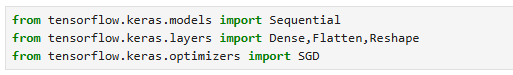

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [9]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))

# Add as many layers in the Encoder network of your choice
encoder.add(Dense(300, activation ="relu"))
encoder.add(Dense(150, activation ="relu"))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))


C:\Users\LOHIDAS\myenv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


C:\Users\vital\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
# Your code to print your Encoder model
#
print(encoder.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 150)                 │          45,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 400)                 │          60,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 200)                 │          80,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 25)                  │           1,275 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 447,675 (1.71 MB)

 Trainable params: 447,675 (1.71 MB)

 Non-trainable params: 0 (0.00 B)

None


In [20]:
# Your OWN Encoder model should be printed here 
# Please do not copy the model below

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 400)            │       314,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │        80,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 25)             │         1,275 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 420,625 (1.60 MB)

 Trainable params: 420,625 (1.60 MB)

 Non-trainable params: 0 (0.00 B)

None


In [11]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))

# Add as many layers in the Decoder as you want. 
# Reember - Encoder and Decoder must be symmetric.
decoder.add(Dense(300, activation = 'relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))

decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))


C:\Users\LOHIDAS\myenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


C:\Users\vital\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Your code to print the Decoder model

print(decoder.summary())


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 50)                  │           1,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 300)                 │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 200)                 │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 400)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 784)                 │         314,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 28, 28)              │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 461,684 (1.76 MB)

 Trainable params: 461,684 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

None


In [24]:
# Your OWN Decoder model should be printed here 
# Please do not copy the model below

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 50)             │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │         5,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 200)            │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 400)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 784)            │       314,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 28, 28)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,384 (1.61 MB)

 Trainable params: 421,384 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

None


____________________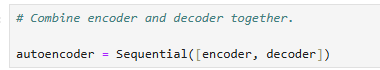

In [13]:
autoencoder = Sequential([encoder, decoder]) 

In [14]:
# Your code to print the Autoencoder model

#
print(autoencoder.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 25)                  │         447,675 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 28, 28)              │         461,684 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 909,359 (3.47 MB)

 Trainable params: 909,359 (3.47 MB)

 Non-trainable params: 0 (0.00 B)

None


In [28]:
# Your OWN Autoencoder model should be printed here 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 25)             │       420,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 28, 28)         │       421,384 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 842,009 (3.21 MB)

 Trainable params: 842,009 (3.21 MB)

 Non-trainable params: 0 (0.00 B)

None


In [32]:
#SGD?

In [15]:
# Your code to compile the Autoencoder. 
# Use binary_crossenropy as loss and metrics as accuracy.

#
autoencoder.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])


___________________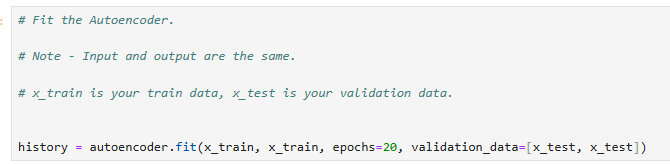

In [16]:
history = autoencoder.fit(x_train, x_train, epochs=41, validation_data=[x_test, x_test])

Epoch 1/41
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 17ms/step - accuracy: 0.1104 - loss: 0.2367 - val_accuracy: 0.2056 - val_loss: 0.1532
Epoch 2/41
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.2102 - loss: 0.1497 - val_accuracy: 0.2231 - val_loss: 0.1428
Epoch 3/41
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.2220 - loss: 0.1419 - val_accuracy: 0.2225 - val_loss: 0.1391
Epoch 4/41
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.2284 - loss: 0.1371 - val_accuracy: 0.2277 - val_loss: 0.1337
Epoch 5/41
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.2350 - loss: 0.1319 - val_accuracy: 0.2286 - val_loss: 0.1307
Epoch 6/41
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.2396 - loss: 0.1287 - val_accuracy: 0.2386 - val_loss: 0.1267
Epoch 7/41
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.2447 - loss: 0.1256 - val_accuracy: 0.2459 - val_loss: 0.1255
Epoch 8/41
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.2472 -

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 21ms/step - accuracy: 0.1292 - loss: 0.2204 - val_accuracy: 0.2148 - val_loss: 0.1363
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.2276 - loss: 0.1322 - val_accuracy: 0.2359 - val_loss: 0.1228
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.2437 - loss: 0.1210 - val_accuracy: 0.2509 - val_loss: 0.1165
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.2539 - loss: 0.1154 - val_accuracy: 0.2514 - val_loss: 0.1127
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.2595 - loss: 0.1113 - val_accuracy: 0.2601 - val_loss: 0.1081
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.2673 - loss: 0.1067 - val_accuracy: 0.2640 - val_loss: 0.1048
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.2730 - loss: 0.1036 - val_accuracy: 0.2721 - val_loss: 0.1020
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.2760 -

____________________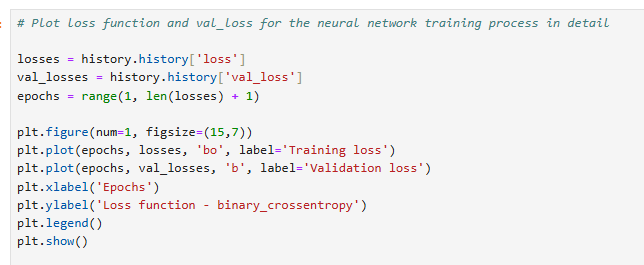

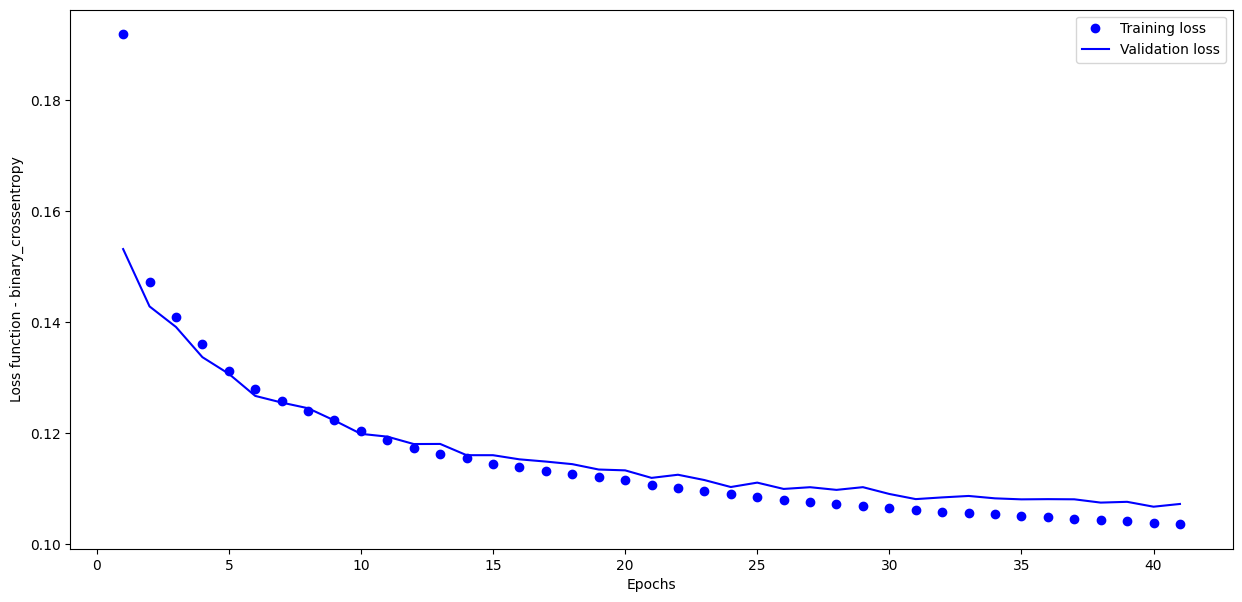

In [17]:
losses = history.history['loss']
val_losses = history.history['val_loss']
epochs = range(1, len(losses) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss function - binary_crossentropy')
plt.legend()
plt.show()

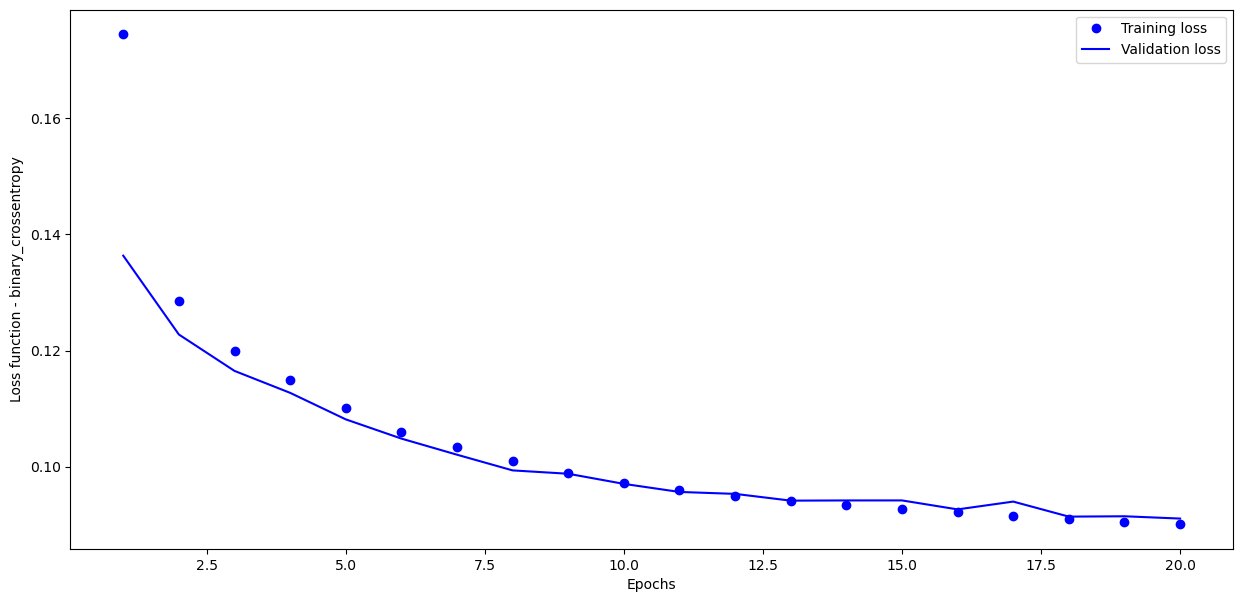

___________________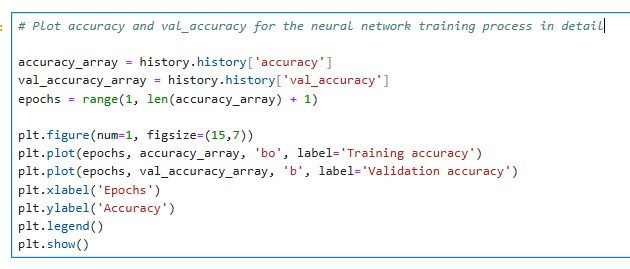

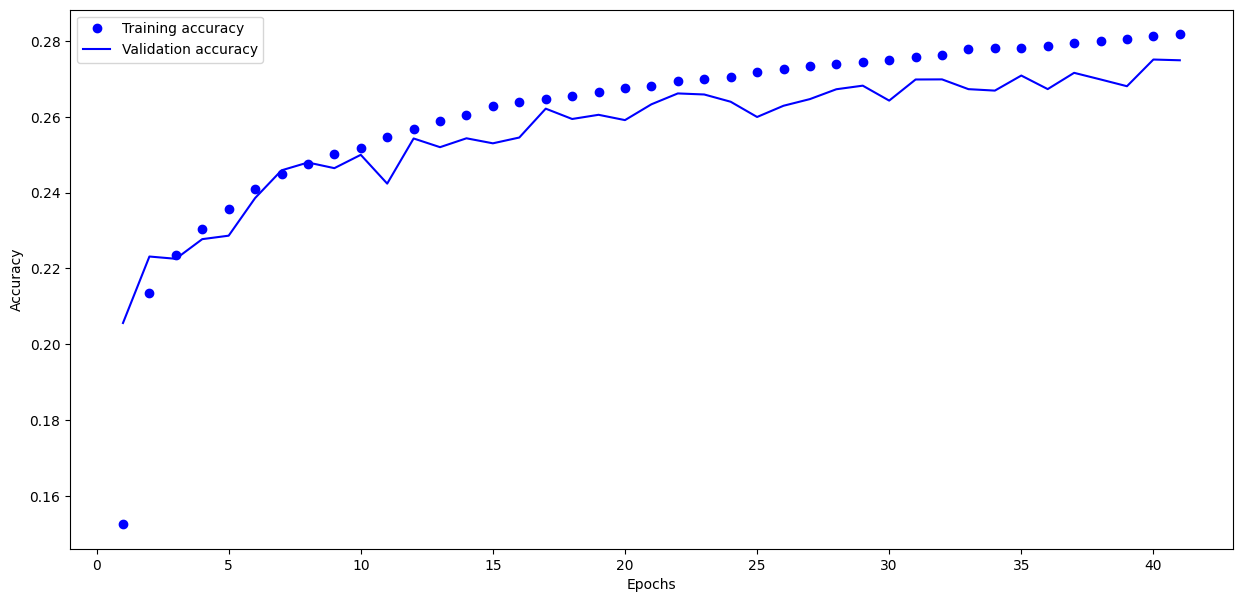

In [18]:
accuracy_array = history.history['accuracy']
val_accuracy_array = history.history['val_accuracy']
epochs = range(1, len(accuracy_array) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, accuracy_array, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy_array, 'b', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

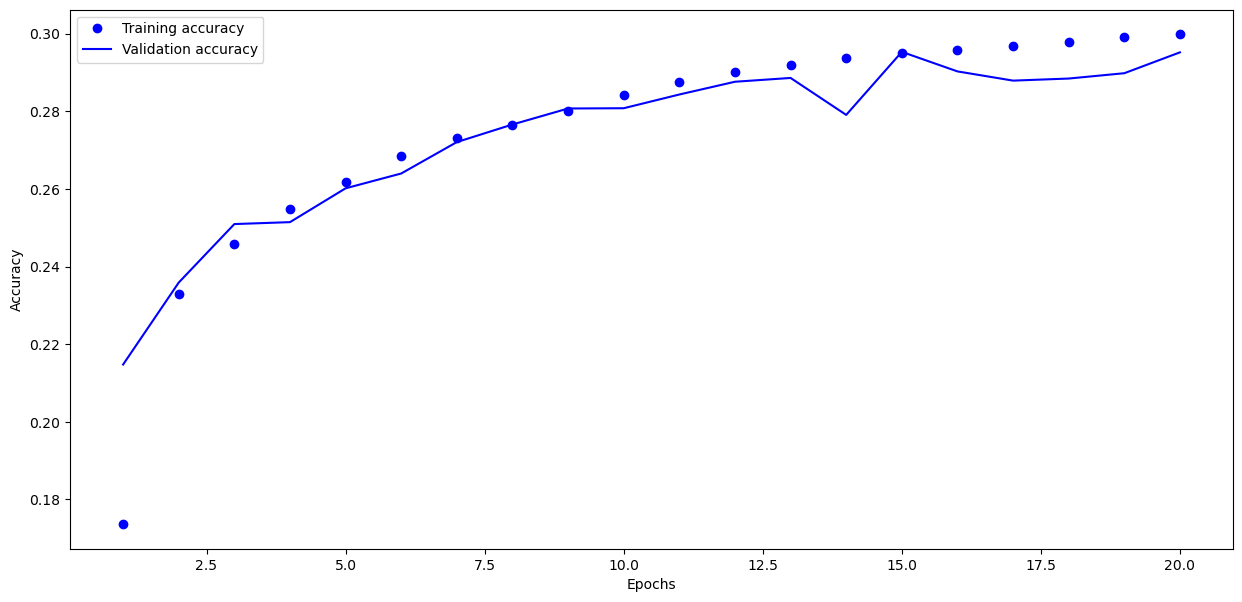

_______________________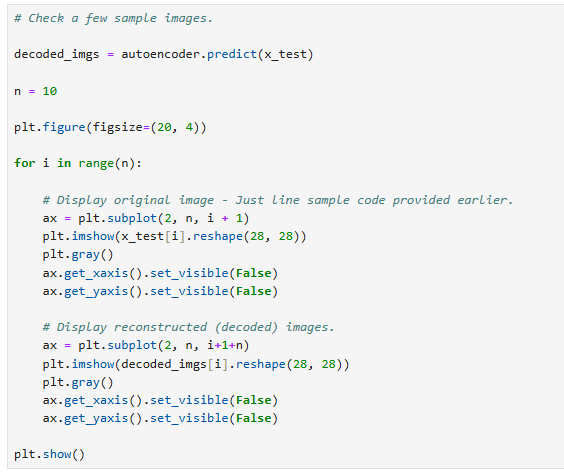

313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step


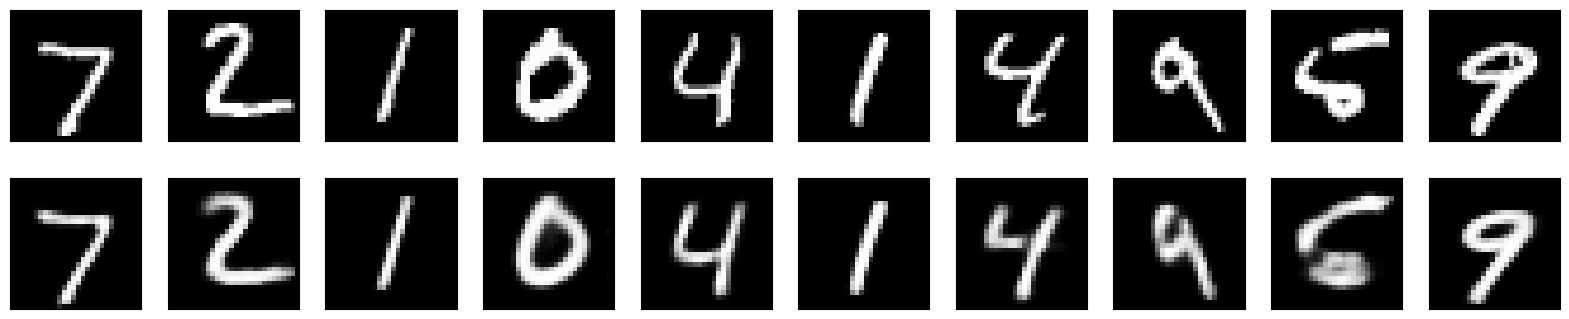

In [19]:
decoded_imgs = autoencoder.predict(x_test)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    
    # Display original image - Just line sample code provided earlier.
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
 
    # Display reconstructed (decoded) images. 
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


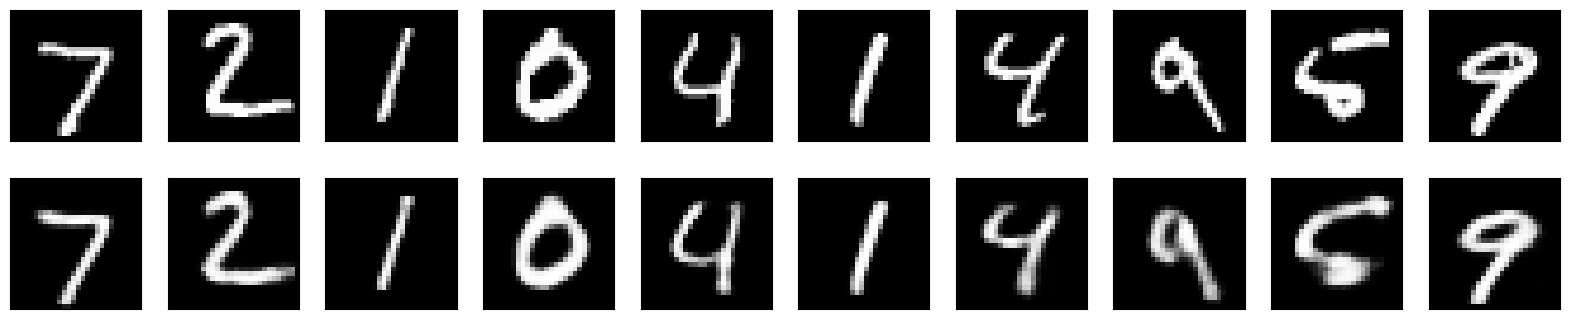

<html> <h3 style="font-style:italic; color:blue;"> AutoEncoders for Denoising Images : </h3> </html>

Use the same digit data set. Add Gaussian noise to it to train an autoencoder that removes noise. Test the noisy samples. 


______________________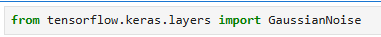

In [20]:
from tensorflow.keras.layers import GaussianNoise

In [149]:
#GaussianNoise?

___________________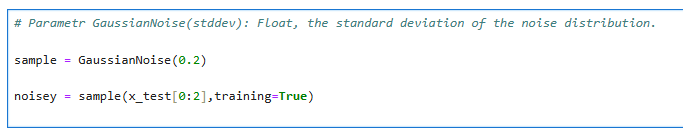

In [21]:
sample = GaussianNoise(0.2)

noisey = sample(x_test[0:2],training=True)

In [ ]:
# Plot the original and noisy images

_______________________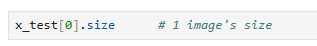

In [23]:
x_test[0:2].size
x_test[0].size 

784

In [24]:
print(x_test.size)         # 10000 images' size
print( int(x_test.size / x_test[0].size) )

7840000
10000


In [25]:
print(x_train.size)         # 60000 images' size
print( int(x_train.size / x_test[0].size) )

47040000
60000


784

____________________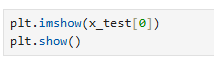

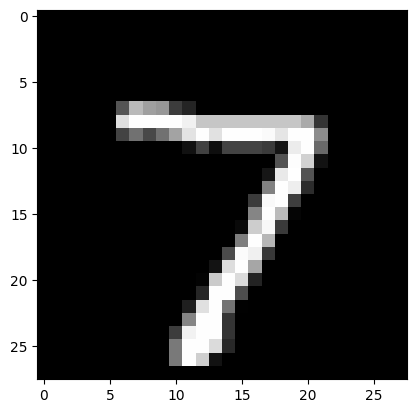

In [26]:
plt.imshow(x_test[0])
plt.show()

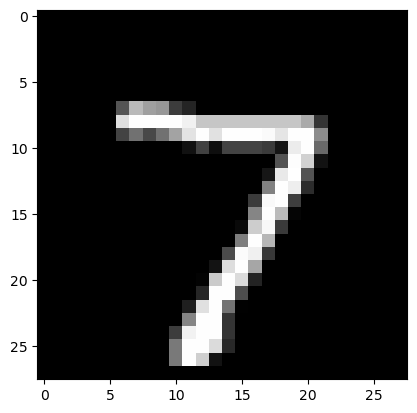

_____________________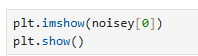

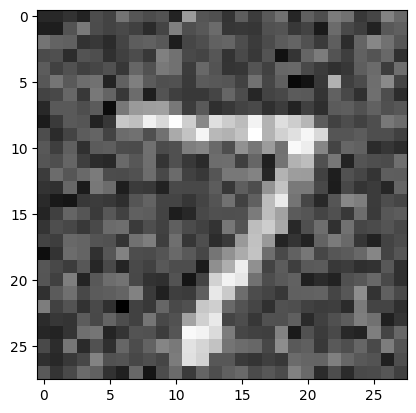

In [27]:
plt.imshow(noisey[0])
plt.show()

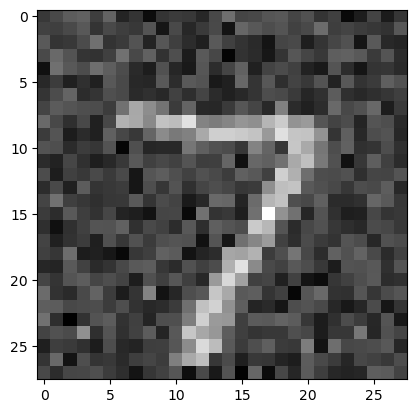

_________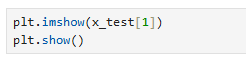

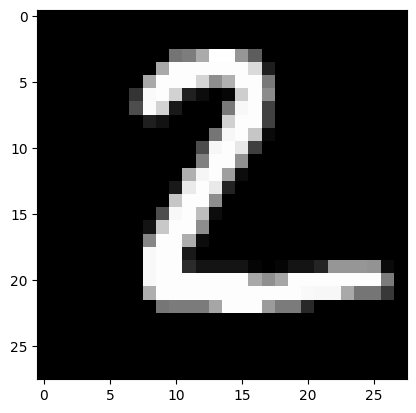

In [28]:
plt.imshow(x_test[1])
plt.show()

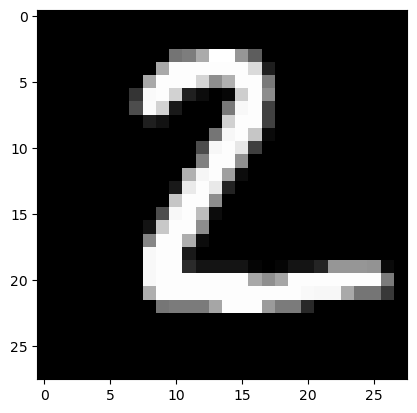

______________________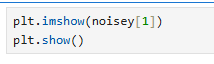

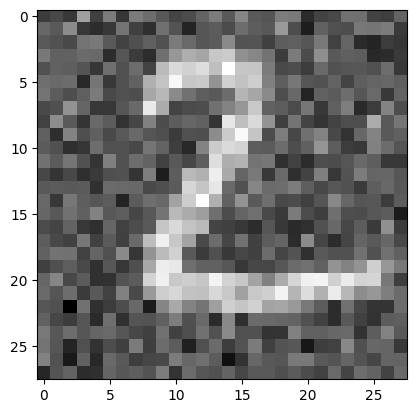

In [29]:
plt.imshow(noisey[1])
plt.show()

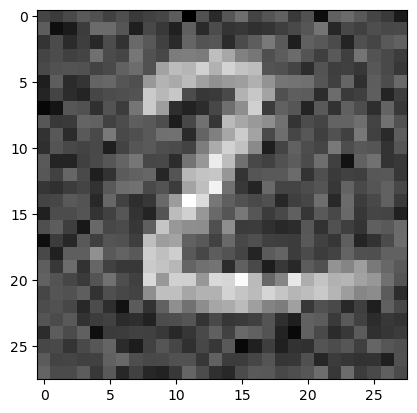

<html> <h4 style="font-style:italic; color:blue;"> Create a noise removal autoencoder and train it </h4> </html>

- Again similar to above it is a symmetric dense network. 
- Gaussian noise is added at the input so that the network sees noisy images and is able to map it to the clean outputs.


### Input - Images with noise
### Labels - Clean images.


In [32]:
# Encoder

encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(GaussianNoise(0.2)) # We are adding noise to make input as noisy images

# Add layers of Encoder network. You could use the same number of layers as you created earlier

encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

print(encoder.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gaussian_noise_1 (GaussianNoise)     │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 400)                 │         314,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 200)                 │          80,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 25)                  │           1,275 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 420,625 (1.60 MB)

 Trainable params: 420,625 (1.60 MB)

 Non-trainable params: 0 (0.00 B)

None


In [70]:
# Your OWN Encoder model should be printed here 
# Please do not copy the model below

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gaussian_noise_1                │ (None, 784)            │             0 │
│ (GaussianNoise)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 400)            │       314,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 200)            │        80,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 25)             │         1,275 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 420,625 (1.60 MB)

 Trainable params: 420,625 (1.60 MB)

 Non-trainable params: 0 (0.00 B)

None


In [33]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))

# Add layers of the Decoder network. You could use the same number of layers as you created earlier
# Reember - Encoder and Decoder must be symmetric

decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))


decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

print(decoder.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 50)                  │           1,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 100)                 │           5,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 200)                 │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 400)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 784)                 │         314,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 28, 28)              │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 421,384 (1.61 MB)

 Trainable params: 421,384 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

None


In [72]:
# Your OWN Decoder model should be printed here 
# Please do not copy the model below

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 50)             │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │         5,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 200)            │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 400)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 784)            │       314,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 28, 28)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,384 (1.61 MB)

 Trainable params: 421,384 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

None


_________________________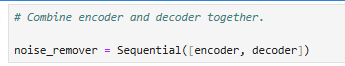

In [34]:
noise_remover = Sequential([encoder, decoder])

In [35]:
# Your code to print the Autoencoder model

print(noise_remover.summary())

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)            │ (None, 25)                  │         420,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_4 (Sequential)            │ (None, 28, 28)              │         421,384 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 842,009 (3.21 MB)

 Trainable params: 842,009 (3.21 MB)

 Non-trainable params: 0 (0.00 B)

None


In [76]:
# Your OWN Autoencoder model should be printed here 

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ (None, 25)             │       420,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_4 (Sequential)       │ (None, 28, 28)         │       421,384 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 842,009 (3.21 MB)

 Trainable params: 842,009 (3.21 MB)

 Non-trainable params: 0 (0.00 B)

None


In [36]:
# Your code to compile the 'noise_remover' model with the same parameters as earlier

# noise_remover.compile( ................  )
noise_remover.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

In [37]:
# Your code to fit 'noise_remover' model with the same parameters as earlier

# history_2 = ..........................
history_2 = noise_remover.fit(x_train, x_train, epochs=10, validation_data=[x_test, x_test])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 16ms/step - accuracy: 0.1400 - loss: 0.2166 - val_accuracy: 0.2231 - val_loss: 0.1330
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.2292 - loss: 0.1329 - val_accuracy: 0.2460 - val_loss: 0.1202
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.2441 - loss: 0.1223 - val_accuracy: 0.2521 - val_loss: 0.1146
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.2514 - loss: 0.1177 - val_accuracy: 0.2552 - val_loss: 0.1124
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.2566 - loss: 0.1143 - val_accuracy: 0.2578 - val_loss: 0.1089
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.2612 - loss: 0.1112 - val_accuracy: 0.2572 - val_loss: 0.1063
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.2678 - loss: 0.1087 - val_accuracy: 0.2694 - val_loss: 0.1046
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.2695 -

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 22ms/step - accuracy: 0.1332 - loss: 0.2187 - val_accuracy: 0.2117 - val_loss: 0.1395
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.2224 - loss: 0.1391 - val_accuracy: 0.2359 - val_loss: 0.1271
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.2384 - loss: 0.1277 - val_accuracy: 0.2476 - val_loss: 0.1192
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.2482 - loss: 0.1217 - val_accuracy: 0.2563 - val_loss: 0.1146
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.2553 - loss: 0.1174 - val_accuracy: 0.2617 - val_loss: 0.1124
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.2578 - loss: 0.1149 - val_accuracy: 0.2522 - val_loss: 0.1105
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.2612 - loss: 0.1129 - val_accuracy: 0.2681 - val_loss: 0.1079
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.2652 -

In [ ]:
# Hint: Use (copy and modify) the code from the cells above

___________________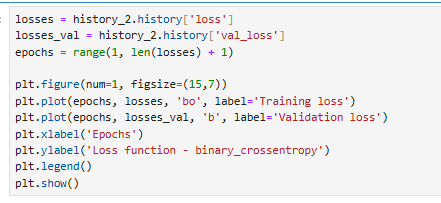

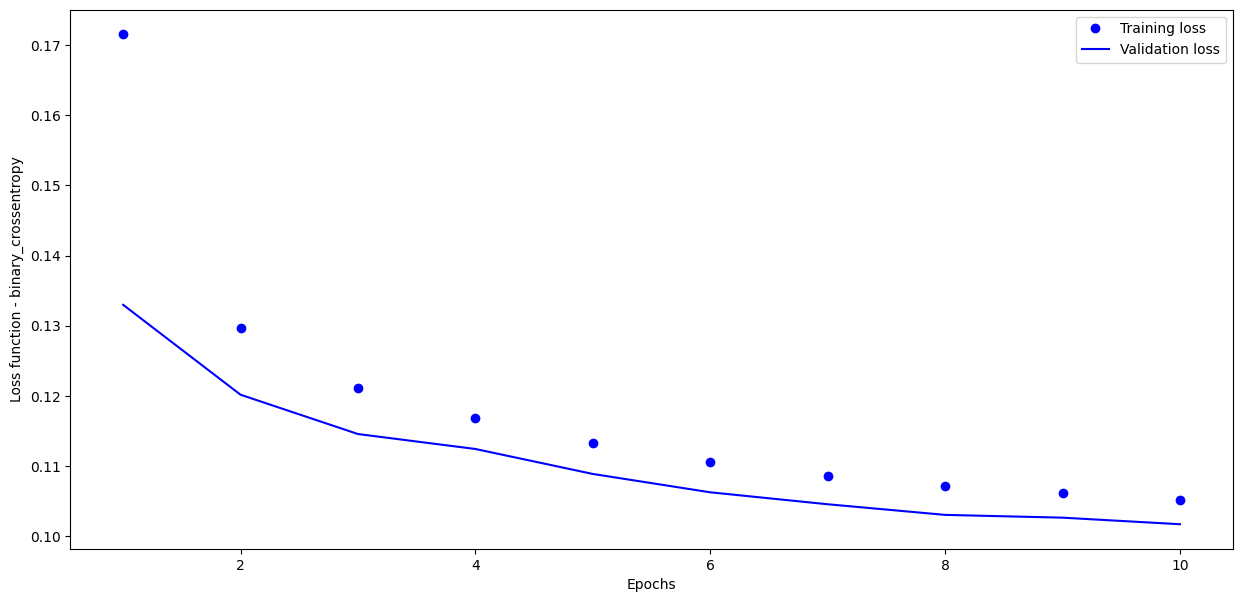

In [38]:
losses = history_2.history['loss']
losses_val = history_2.history['val_loss']
epochs = range(1, len(losses) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, losses, 'bo', label='Training loss')
plt.plot(epochs, losses_val, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss function - binary_crossentropy')
plt.legend()
plt.show()

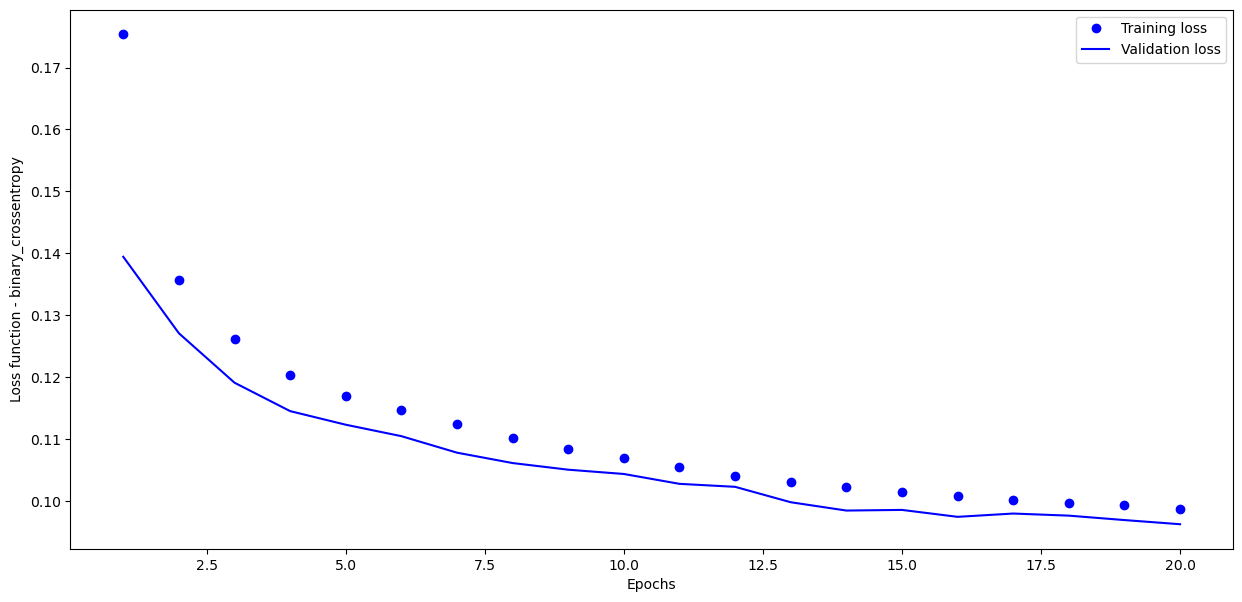

___________________________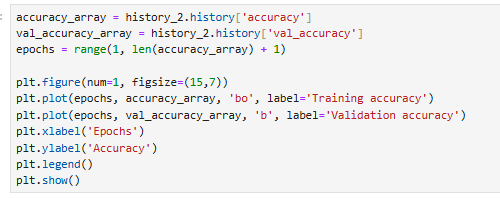

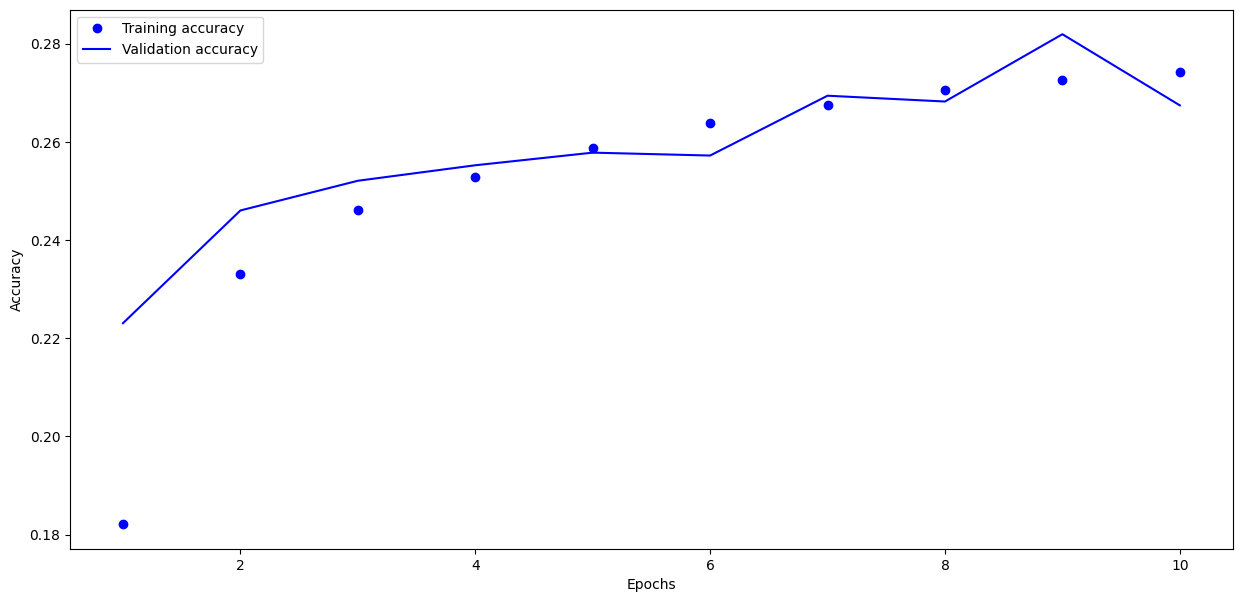

In [39]:
accuracy_array = history_2.history['accuracy']
val_accuracy_array = history_2.history['val_accuracy']
epochs = range(1, len(accuracy_array) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, accuracy_array, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy_array, 'b', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

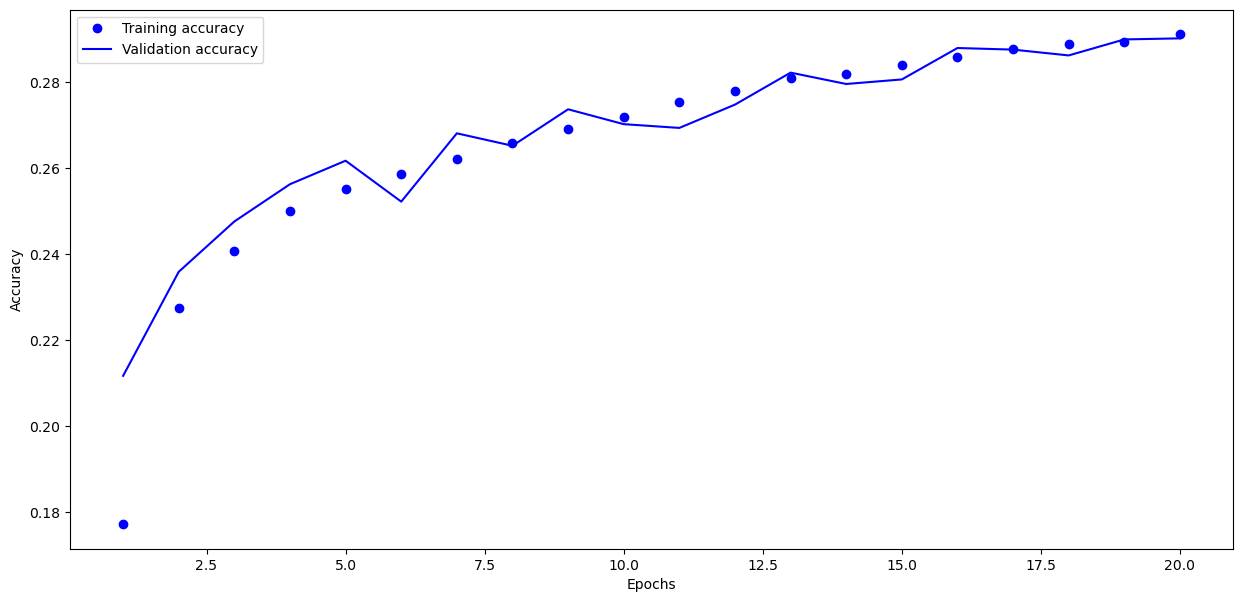

______________________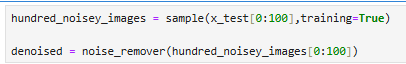

In [40]:
hundred_noisey_images = sample(x_test[0:100],training=True)

denoised = noise_remover(hundred_noisey_images[0:100])

______________________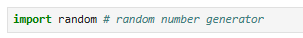

In [41]:
import random

_______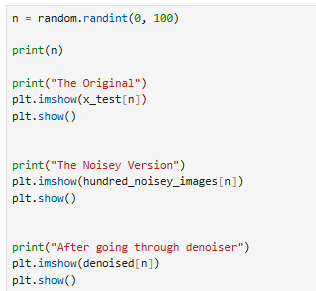

15
The Original


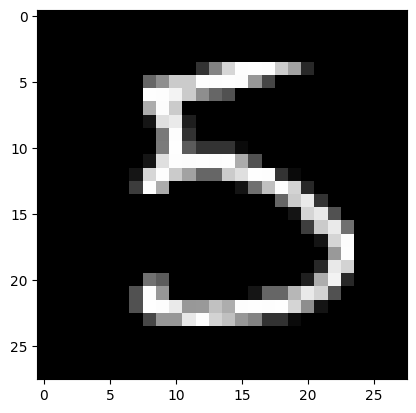

The Noisey Version


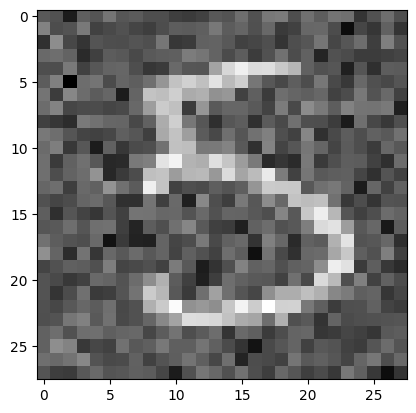

After going through denoiser


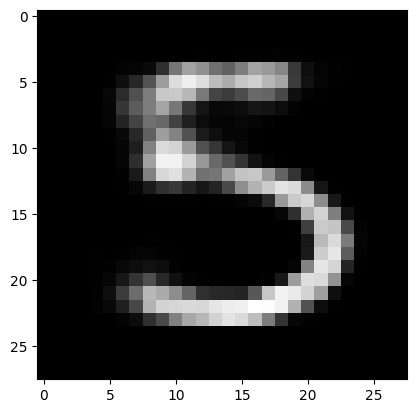

In [42]:
n = random.randint(0, 100)

print(n)

print("The Original")
plt.imshow(x_test[n])
plt.show()


print("The Noisey Version")
plt.imshow(hundred_noisey_images[n])
plt.show()


print("After going through denoiser")
plt.imshow(denoised[n])
plt.show()

56
The Original


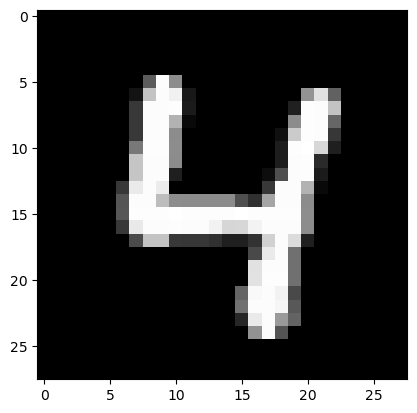

The Noisey Version


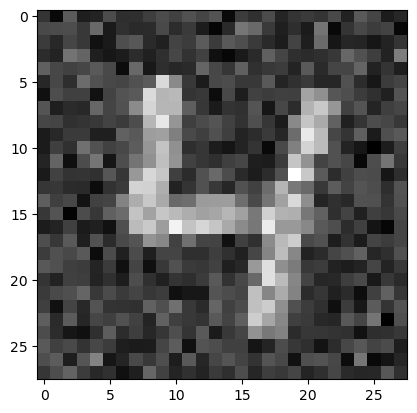

After going through denoiser


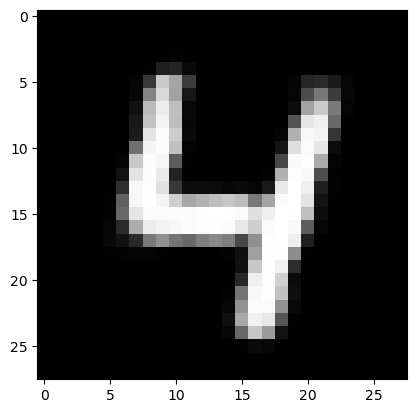

<html> <h2 style="font-style:bold; color:red;"> Lab Logbook requirements </h2> </html>

 - Put the Encoder, Decoder and Basic Autoencoder models using summary() in your lab logbook.

Ensure that no code or other information is added to the logbook and that only required information is present. Marks will not be awarded if anything else is found in the logbook or instructions are not clearly followed.

NOTE: DON'T FORGET TO SAVE AND BACK UP YOUR COMPLETED JUPYTER NOTEBOOK AND LAB LOGBOOK ON GITHUB OR ONEDRIVE.